In [ ]:
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Create a path to main folder
path = r'C:\Users\reece\InstaCart Basket Analysis 4.4.23'

# Import dataset
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data','orders_products_merged_aggregated.pkl'))
file_path = r'C:\Users\reece\InstaCart Basket Analysis 4.4.23\Data\Prepared Data\wrangled_cust_merged.pkl'
customer = pd.read_pickle(file_path)


In [20]:
df.head()


,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,add_to_cart_order,reordered,_merge,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,5,0,both,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,1,both,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,20,0,both,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,10,0,both,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,11,1,both,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer


In [21]:
customer.head()


,Product_Name,Prices,user_id,days_since_prior_order,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,Chocolate Sandwich Cookies,5.8,138,3.0,Most orders,32,Regular customer,Low spender,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,Chocolate Sandwich Cookies,5.8,138,20.0,Average orders,32,Regular customer,Low spender,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,Chocolate Sandwich Cookies,5.8,709,6.0,Average orders,5,New customer,Low spender,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302
3,Chocolate Sandwich Cookies,5.8,764,9.0,Average orders,3,New customer,Low spender,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308
4,Chocolate Sandwich Cookies,5.8,777,26.0,Average orders,26,Regular customer,Low spender,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797


In [22]:
df_subset = df.sample(n=20000, random_state=42)


In [23]:
df_subset.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,add_to_cart_order,reordered,_merge,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag
980774,5646,Organic Turkey Bacon,106,12,24.2,428781,47729,5,2,18,...,3,1,both,Average orders,25,Regular customer,8.571395,Low spender,12.0,Regular customer
8900108,45007,Organic Zucchini,83,4,7.9,3106830,43527,33,6,17,...,21,1,both,Average orders,43,Loyal customer,7.879286,Low spender,7.0,Frequent customer
2937884,16325,Turmeric,104,13,10.8,741876,57055,1,1,1,...,20,0,both,Least orders,17,Regular customer,8.058549,Low spender,19.0,Regular customer
4985784,25435,Original Lemonade,115,7,7.6,157524,268,5,0,8,...,1,0,both,Average orders,9,New customer,7.256716,Low spender,30.0,Regular customer
9609153,47977,Grapefruit Sparkling Water,115,7,14.0,2899128,35857,1,2,15,...,3,0,both,Most orders,23,Regular customer,8.620000,Low spender,7.0,Frequent customer


In [24]:
#add department_id into customer df 

merged_df = customer.merge(df_subset[['user_id', 'department_id']], on='user_id', how='left')


In [25]:
print(merged_df['department_id'].unique())


[nan 19. 12.  7. 16. 13.  3. 17.  4.  1.  9. 20. 10. 14.  6. 15. 21. 18.
 11.  5.  8.  2.]


In [26]:
# Finding NaN values in Department id -  I had to add department_id back in as well as Max Order 
merged_df[merged_df['department_id'].isnull()]

,Product_Name,Prices,user_id,days_since_prior_order,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,department_id
0,Chocolate Sandwich Cookies,5.8,138,3.0,Most orders,32,Regular customer,Low spender,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,NaN
1,Chocolate Sandwich Cookies,5.8,138,20.0,Average orders,32,Regular customer,Low spender,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,NaN
2,Chocolate Sandwich Cookies,5.8,709,6.0,Average orders,5,New customer,Low spender,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,NaN
3,Chocolate Sandwich Cookies,5.8,764,9.0,Average orders,3,New customer,Low spender,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,NaN
4,Chocolate Sandwich Cookies,5.8,777,26.0,Average orders,26,Regular customer,Low spender,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735811,Fresh Foaming Cleanser,13.5,52884,6.0,Average orders,23,Regular customer,Low spender,Frequent customer,Female,Washington,45,2/18/2020,0,single,162867,NaN
10735812,Fresh Foaming Cleanser,13.5,55650,9.0,Average orders,33,Regular customer,Low spender,Frequent customer,Female,District of Columbia,51,7/10/2019,0,single,81294,NaN
10735813,Fresh Foaming Cleanser,13.5,57228,10.0,Most orders,22,Regular customer,Low spender,Frequent customer,Female,Colorado,81,10/6/2018,2,married,105712,NaN
10735814,Fresh Foaming Cleanser,13.5,57383,30.0,Average orders,14,Regular customer,Low spender,Regular customer,Female,Delaware,35,6/1/2017,2,married,79354,NaN


In [30]:

merged_df = merged_df.dropna(subset=['department_id'])


In [31]:
customer = merged_df

In [32]:
customer.head()

,Product_Name,Prices,user_id,days_since_prior_order,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,department_id
32,Chocolate Sandwich Cookies,5.8,2850,9.0,Most orders,23,Regular customer,Low spender,Frequent customer,Male,Utah,22,7/5/2019,1,married,46105,19.0
33,Chocolate Sandwich Cookies,5.8,2850,9.0,Most orders,23,Regular customer,Low spender,Frequent customer,Male,Utah,22,7/5/2019,1,married,46105,12.0
34,Chocolate Sandwich Cookies,5.8,2857,10.0,Average orders,25,Regular customer,Low spender,Regular customer,Female,Alabama,30,9/23/2017,2,married,91407,7.0
37,Chocolate Sandwich Cookies,5.8,4006,7.0,Most orders,42,Loyal customer,Low spender,Frequent customer,Male,North Carolina,28,5/26/2017,0,single,96906,16.0
38,Chocolate Sandwich Cookies,5.8,4006,7.0,Most orders,42,Loyal customer,Low spender,Frequent customer,Male,North Carolina,28,5/26/2017,0,single,96906,13.0


In [33]:
#region 1 Northeast ME, NH, VT, MA, RI, CT

customer.loc[customer['STATE'].isin(['Maine', 'New Hampshire', 'Vermont', 'Delaware', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New Jersey', 'New York', 'Pennsylvania']), 'region'] = 'North'
    
                               
                      


In [34]:
#region 2 Midwest Wisconsin, Michigan, Illinois, Indiana, Ohio, north dakoa, south dakoa, nebraska, kansas, Minnesota, Iowa, Missouri

customer.loc[customer['STATE'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio','North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'


In [35]:
#region 3 South  Delaware, Maryland, District of Columbia, Virginia, West Virginia, North Carolina, South Carolina, Georgia, Florida, Kentucky, Tennessee, Mississippi, Alabama

customer.loc[customer['STATE'].isin(['Delaware', 'Texas', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Louisiana', 'Arkansas', 'Alabama']), 'region'] = 'South'


In [36]:
#region 4 West Idaho, Montana, Wyoming, Nevada, Utah, Colorado, Arizona, New Mexico

customer.loc[customer['STATE'].isin(['Idaho','Oklahoma',  'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'
                                  


In [37]:
# Finding NaN states 
customer[customer['region'].isnull()]

,Product_Name,Prices,user_id,days_since_prior_order,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,department_id,region


In [38]:
# checking region col 
customer['region'].value_counts(dropna = False)

South      2009108
West       1775483
Midwest    1476450
North      1196341
Name: region, dtype: int64

In [39]:
customer['spending_flag'].unique()


array(['Low spender', 'High spender'], dtype=object)

In [40]:
#crosstab we are going to analyze spending habits from column spending flag with the different regions from column region
crosstab = pd.crosstab(customer['region'], [customer['spending_flag']], dropna=False)


In [41]:
crosstab.to_clipboard()

In [42]:
crosstab.head()

spending_flag,High spender,Low spender
region,,
Midwest,26267,1450183
North,23182,1173159
South,32461,1976647
West,35653,1739830


From the crosstab we can surmise that the Southern Region has the largest customer base combined, and when you rank high and low spenders indivindually 


In [43]:
#creating exclusion flag for cusoter with less than five orders
df_removing_low_spenders = customer[customer['max_order'] >= 5]

In [44]:
df_removing_low_spenders.head()

,Product_Name,Prices,user_id,days_since_prior_order,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,department_id,region
32,Chocolate Sandwich Cookies,5.8,2850,9.0,Most orders,23,Regular customer,Low spender,Frequent customer,Male,Utah,22,7/5/2019,1,married,46105,19.0,West
33,Chocolate Sandwich Cookies,5.8,2850,9.0,Most orders,23,Regular customer,Low spender,Frequent customer,Male,Utah,22,7/5/2019,1,married,46105,12.0,West
34,Chocolate Sandwich Cookies,5.8,2857,10.0,Average orders,25,Regular customer,Low spender,Regular customer,Female,Alabama,30,9/23/2017,2,married,91407,7.0,South
37,Chocolate Sandwich Cookies,5.8,4006,7.0,Most orders,42,Loyal customer,Low spender,Frequent customer,Male,North Carolina,28,5/26/2017,0,single,96906,16.0,South
38,Chocolate Sandwich Cookies,5.8,4006,7.0,Most orders,42,Loyal customer,Low spender,Frequent customer,Male,North Carolina,28,5/26/2017,0,single,96906,13.0,South


In [45]:
df_removing_low_spenders.shape

(6428243, 18)

In [46]:
# Exporting subset to pickle
df_removing_low_spenders.to_pickle(os.path.join(path, 'wrangled_cust_merged_without_low_spender.pkl'))

In [47]:
customer.to_csv(os.path.join(path, 'customer.csv'))

In [48]:
df_removing_low_spenders.head()


,Product_Name,Prices,user_id,days_since_prior_order,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,department_id,region
32,Chocolate Sandwich Cookies,5.8,2850,9.0,Most orders,23,Regular customer,Low spender,Frequent customer,Male,Utah,22,7/5/2019,1,married,46105,19.0,West
33,Chocolate Sandwich Cookies,5.8,2850,9.0,Most orders,23,Regular customer,Low spender,Frequent customer,Male,Utah,22,7/5/2019,1,married,46105,12.0,West
34,Chocolate Sandwich Cookies,5.8,2857,10.0,Average orders,25,Regular customer,Low spender,Regular customer,Female,Alabama,30,9/23/2017,2,married,91407,7.0,South
37,Chocolate Sandwich Cookies,5.8,4006,7.0,Most orders,42,Loyal customer,Low spender,Frequent customer,Male,North Carolina,28,5/26/2017,0,single,96906,16.0,South
38,Chocolate Sandwich Cookies,5.8,4006,7.0,Most orders,42,Loyal customer,Low spender,Frequent customer,Male,North Carolina,28,5/26/2017,0,single,96906,13.0,South


In [49]:
# Task 5. Creating customer profiles
# Age Flag
age_flag = []
for row in customer['Age'].tolist():
    if row <= 25:
        age_flag.append('Young')
    elif row > 25 and row < 60:
        age_flag.append('Middle-aged')
    elif row >= 60:
        age_flag.append('Senior')
    else:
        print('Weird value:', row)

In [50]:
customer['age_profile'] = age_flag


In [51]:
customer['age_profile'].value_counts(dropna = False)

Middle-aged    3534933
Senior         2139247
Young           783202
Name: age_profile, dtype: int64

In [52]:
# Income flag
income_flag = []
for row in customer['income'].tolist():
    if row < 40000:
        income_flag.append('Low-income')
    elif row >= 40000 and row < 100000:
        income_flag.append('Mid-income')
    elif row >= 100000:
        income_flag.append('High-income')
    else:
        print('Weird value:', row)

In [53]:
customer['income_profile'] = income_flag

In [54]:
customer['income_profile'].value_counts(dropna = False)

Mid-income     3203940
High-income    2975942
Low-income      277500
Name: income_profile, dtype: int64

In [55]:
# single adult or young parent flag
child_flag = []
for row in customer['n_dependants'].tolist():
    if row == 0:
        child_flag.append('Single Adult')
    elif row > 0:
        child_flag.append('Parent')
    else:
        print('Weird value:', row)

In [56]:
customer['child_profile'] = child_flag

In [57]:
customer['child_profile'].value_counts(dropna = False)

Parent          4896676
Single Adult    1560706
Name: child_profile, dtype: int64

In [58]:
#Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.
#You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a w
#ay they would impact customer profiles. 


In [63]:
crosstab_department_dependants= pd.crosstab(customer['department_id'], [customer['n_dependants']], dropna=False)


In [64]:
crosstab_department_dependants.to_clipboard()

In [65]:
crosstab_department_dependants.head()


n_dependants,0,1,2,3
department_id,,,,
1.0,100351,115090,108885,103949
2.0,2242,712,1341,630
3.0,64465,61327,54564,60447
4.0,474263,473990,470706,501423
5.0,4915,5924,6688,3238


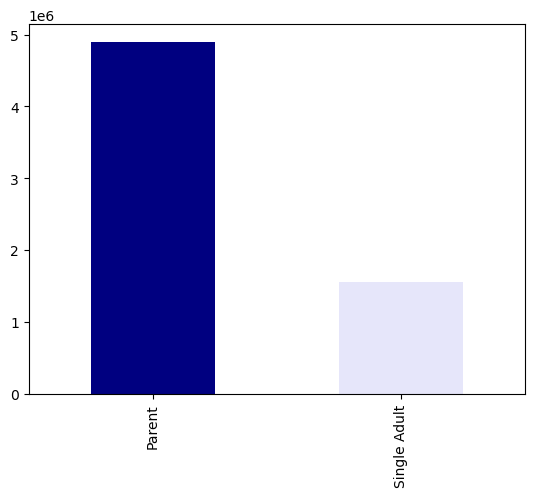

In [66]:
profile_dist_bar = customer['child_profile'].value_counts().plot.bar(color=['navy', 'lavender', 'lavender', 'lavender', 'lavender'])


In [67]:
# grouping profiles by mean, max, and min expenditure 
customer.groupby('child_profile').agg({'Prices' : ['mean', 'max', 'min']})

Prices              
                    mean      max  min
child_profile                         
Parent          9.939816  99999.0  1.0
Single Adult   11.016530  99999.0  1.0

In [68]:
customer.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'final_customer.pkl'))


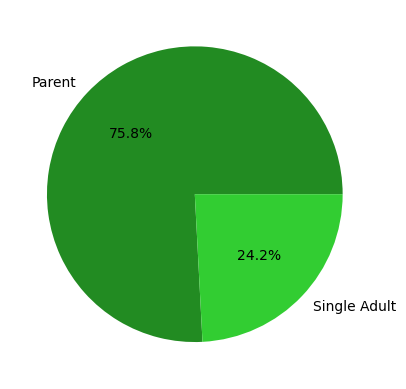

In [69]:
# Task 6 Visualizing profiles
# Parent Flag Visualization
plt.pie(customer['child_profile'].value_counts(), autopct='%1.1f%%', labels = customer['child_profile'].unique(), colors = ['forestgreen', 'limegreen', 'lightgreen'])
plt.savefig(os.path.join(path, 'child_profiles_pie.png'))

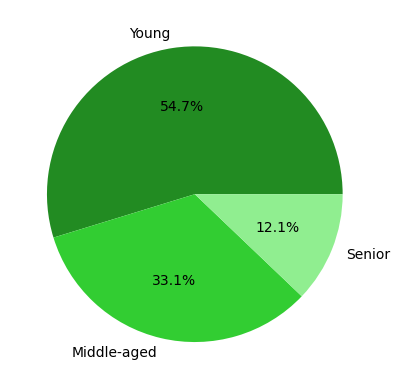

In [70]:
# Task 6 Visualizing profiles
# Age Flag Visualization
plt.pie(customer['age_profile'].value_counts(), autopct='%1.1f%%', labels = customer['age_profile'].unique(), colors = ['forestgreen', 'limegreen', 'lightgreen'])
plt.savefig(os.path.join(path, 'age_profiles_pie.png'))

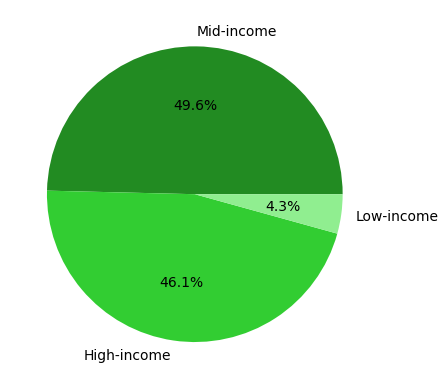

In [71]:
# Task 6 Visualizing profiles
# Age Flag Visualization
plt.pie(customer['income_profile'].value_counts(), autopct='%1.1f%%', labels = customer['income_profile'].unique(), colors = ['forestgreen', 'limegreen', 'lightgreen'])
plt.savefig(os.path.join(path, 'income_files_pie.png'))

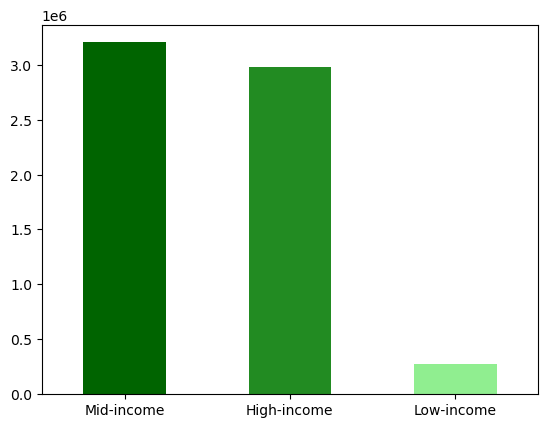

In [72]:
# Income flag visualization
customer['income_profile'].value_counts().plot.bar(color = ['darkgreen', 'forestgreen', 'lightgreen'],)
plt.xticks(rotation = 0)
plt.savefig(os.path.join(path, 'income_profile_distribution.png'))

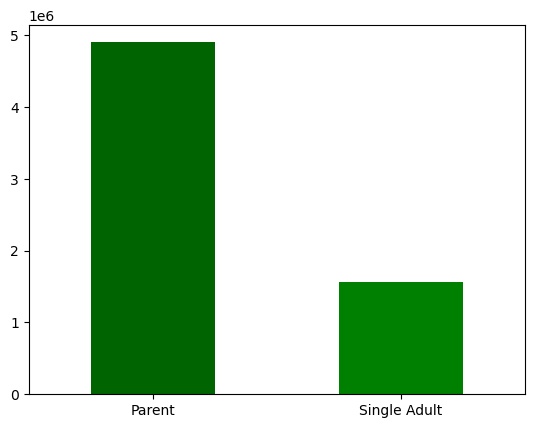

In [73]:
customer['child_profile'].value_counts().plot.bar(color = ['darkgreen', 'green'])
plt.xticks(rotation = 0)
plt.savefig(os.path.join(path, 'family_profile_distribution.png'))

In [74]:
# Regional age differences
regional_age_crosstab = pd.crosstab(customer['region'], customer['age_profile'], dropna = False)

In [75]:
cmap = plt.colormaps['summer']
cmap2 = plt.colormaps['gnuplot']

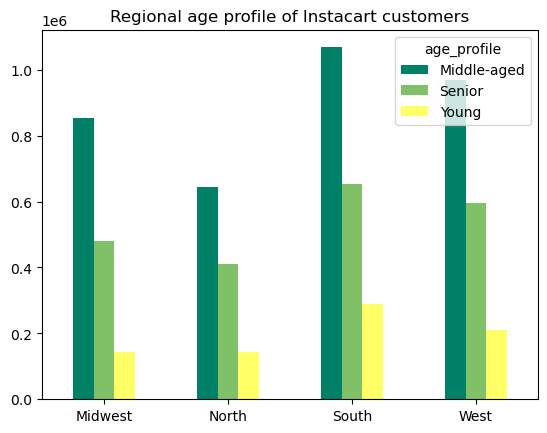

In [76]:
regional_age_crosstab.plot(kind = 'bar', stacked = False, title = 'Regional age profile of Instacart customers', cmap = cmap, xlabel = '')
plt.xticks(rotation = 0)
plt.savefig(os.path.join(path, 'regional_age_distribution_bar.png'))

In [77]:
# Regional income differences
regional_income_crosstab = pd.crosstab(customer['region'], customer['income_profile'], dropna = False)


<Figure size 640x480 with 0 Axes>

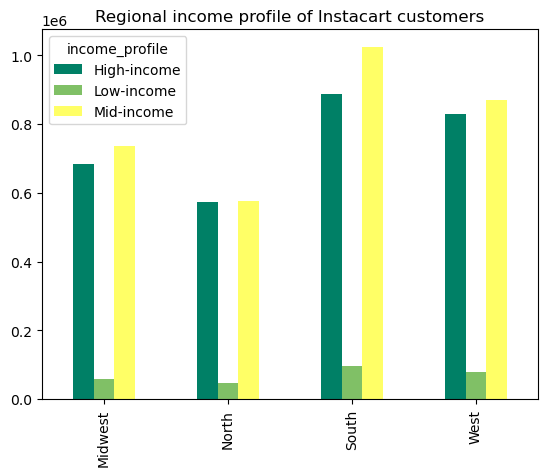

In [81]:
regional_income_bar = regional_income_crosstab.plot(kind = 'bar', stacked = False, title = 'Regional income profile of Instacart customers', cmap = cmap, xlabel = '')
plt.savefig(os.path.join(path, 'regional_income_profile_of_instacart_customers.png'))

In [79]:
# Regional family status differences
regional_children_crosstab = pd.crosstab(customer['region'], customer['child_profile'], dropna = False)

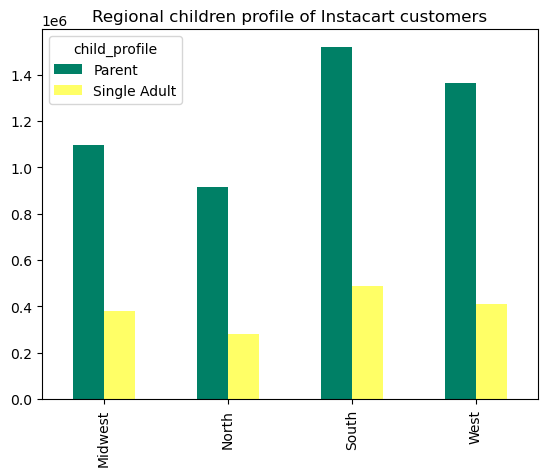

In [80]:
regional_children_bar = regional_children_crosstab.plot(kind = 'bar', stacked = False, title = 'Regional children profile of Instacart customers', cmap = cmap, xlabel = '')
plt.savefig(os.path.join(path, 'regional_children_profile_of_instacart_customers.png'))